# PROYECTO 2

**Integrantes:**
- Diego Armando Roman Amezcua
- Diego Vega
- Sergio Alatorre Soto

## Cálculo de volumen de arandelas

### Objetivos
#### General:
Mediante el uso de simulación matemática e integración Montecarlo optimizar el cálculo de volumen de arandelas a gran escala.

#### Específicos:
- Definir la función o datos a integrar. 
- Definir el uso o necesidades de la simulación.
- Utilizar teoría de cálculo integral e integración montecarlo para el planteamiento del problema. 
- Usar herramientas computacionales para llevar a cabo un modelo.
- Resolver y cumplir el motivo principal del problema.

### Problema:

Una constructora diseña y manda a construir cientos de arandelas de diferentes tamaños cada mes.  

Hace uso de ellas en obras y por cuestiones de control, necesitan saber el volumen de cada una de las arandelas que mandan a fabricar. Esto con el objetivo de llevar un registro o poder encontrar el peso total de sus cargas. 

La constructora desea hacer uso de la tecnología para optimizar este proceso y encontrar la forma de hacer el cálculo mucho más eficiente.

Las arandelas que la constructora usa son completamente circulares y tienen un corte de 45° en la parte exterior.

Por lo tanto, el objetivo es diseñar un método para el cálculo del volumen de una arandela independientemente de sus dimensiones y cortes.

### Modelo que representa el problema

Primeramente debes encontrar la forma cómun de calcular el volumen de una arandela. Para ello calcularemos el volumen de un sólido en revolución.

Visualizando la arandela:

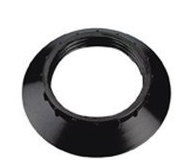

Tomando en cuenta solo el área y su radio tenemos que:
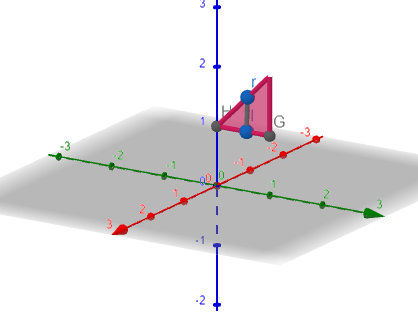
o también la forma:
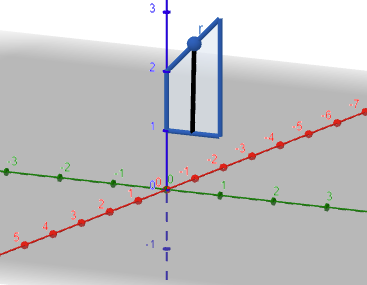


Si el radio exterior es R(x) y el interior r(x).

El área de esta arandela es:

$$A(x) = \pi[R(x)]^2-\pi[r(x)]^2 = \pi([R(x)]^2-[r(x)]^2)$$

Por lo tanto, el volumen de arandelas para rotación alrededor del eje es: 

$$ V = \int_{a}^{b} A(x)\text{d}x = \int_{a}^{b} \pi([R(x)]^2-[r(x)]^2)\text{d}x$$

Al ser la parte exterior un corte de 45° que empieza a partir del radio exterior, y = x + re. 
Al ser la parte interior una constante, y = ri (radio interior).

Reemplazando estos datos, tenemos: 

$$ V = \int_{a}^{b} A(x)\text{d}x = \int_{a}^{b} \pi([x + re]^2-[ri]^2)\text{d}x$$

Esta es la integral a simular por medio de Montecarlo.



En consecuencia, se programará una función con los siguientes parámetros:
- Número de arandelas
- Radio exterior en cm.
- Radio interior en cm. 
- Grosor/altura de la arandela.

Nos dará como resultado:
- Descripción de los datos.
- Radio de extremo a extremo. 
- Volumen de arandela.
- Volumen total.

Se usará integración montecarlo tipo 1 con 10000 términos.

### Solución del problema

In [1]:
import numpy as np
import pandas as pd

In [37]:
def volumen(n, re, ri, h):
    # n = Número de arandelas
    # re = Radio exterior en cm.
    # ri = Radio interior en cm.
    # h = Grosor/altura de la arandela en cm.
    
    # Radio del otro extremo
    rf = re + (h)
    
    # Integración
    u = np.random.uniform(0, h, 10000)
    f = np.pi*((u+(re))**2-(ri)**2)
    
    # Calculo
    vol = np.mean(f)*(h)
    volt = vol*n
    
    print("Número de arandelas: {}".format(n))
    print("Arandela con radio que va de {} cm a {} cm de extremo a extremo".format(re, rf))
    print("con orificio de {} cm de radio y un grosor de {} cm".format(ri, h))
    print("Volumen de arandela: {} cm^3".format(round(vol,2)))
    print("Volumen total: {} cm^3".format(round(volt,2)))

In [38]:

volumen(500, 3, 1, 2)

Número de arandelas: 500
Arandela con radio que va de 3 cm a 5 cm de extremo a extremo
con orificio de 1 cm de radio y un grosor de 2 cm
Volumen de arandela: 96.29 cm^3
Volumen total: 48144.72 cm^3


**Comprobación:**

Al evaluar la integral a mano, tenemos:

$$ V = \int_{a}^{b} A(x)\text{d}x = \int_{a}^{b} \pi([x + re]^2-[ri]^2)\text{d}x = \pi\int_{a}^{b} (x^2 + 2xre + re^2 -ri^2)\text{d}x$$
$$ = \pi (\frac{x^3}{3} + x^2re + xre^2 - xri^2)|b,a $$
$$= \pi (\frac{x^3}{3} + 3x^2 + 9x - x)|2,0 = \pi (\frac{8}{3} + 12 + 16) =$$
$$96.34$$

Vemos que simulación montecarlo llegó a 96.29, lo cual es bastante similar al cálculo a mano.

Como conclusión, se logró llevar a cabo una integración montecarlo para cumplir con los objetivos y restricciones de la constructora. A pesar de ser un cálculo relativamente fácil, este ejercicio nos ayuda a ver la utilidad de esta simulación e integración montecarlo.

También vemos la importancia del uso de tecnología y lenguajes de programación para optimizar y hacer más efeciente procesos dentro de la industria, en este caso, para constructoras. 




**Referencias:**

- Facultad de Ciencias Exactas y Naturales & Universidad Nacional de Cuyo. (s. f.). Método de discos. FCEN. https://fcen.uncuyo.edu.ar/upload/material-aplicacion-de-integrales-clase-invertida.pdf 

- Universidad de La Habana. (2022). El cálculo integral y sus aplicaciones en la Inteniería civil. scielo. http://scielo.sld.cu/pdf/rp/v10n2/2308-3042-rp-10-02-65.pdf